# Predicting  stock close price movement
Compare the result of using 3 different models:
1. Logistic Regression
2. Support Vector Machine
3. Neural Network

### Import library

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import scipy
import pydotplus
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow
from keras import models, layers, optimizers, regularizers
from sklearn import model_selection, preprocessing
from sklearn import linear_model, metrics, model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Data Precessing

Stock price record from S&P 500

Data source: https://www.sharecast.com/index/SP_500/prices/download



Training set: $\;\;\;\;$ 02-Jan-2009 to 29-Dec-2017


Test set:  $\;\;\;\;\;\;$02-Jan-2018 to 31-Dec-2018

In [44]:
df_train = pd.read_csv('./desktop/train_set.csv')
df_train.head(3)

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032


In [45]:
df_test = pd.read_csv('./desktop/test_set.csv')
df_test.head(3)

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744


### Select features

Open Price , High Price , Low Price

### drop useless features

In [46]:
x_train = df_train.drop(['Date', 'Volume', 'Close Price'], axis =1)
x_test = df_test.drop(['Date', 'Volume', 'Close Price'], axis =1)


### Set target data

Set target(note as y_test, y_train here)

1: when close price rise at the next day

0: when close price fall at the next day

In [47]:
y_test = np.where (df_test['Close Price'].shift(-1) > df_test['Close Price'],1,0)
y_train = np.where (df_train['Close Price'].shift(-1) > df_train['Close Price'],1,0)

### Standardlize datas

In [48]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## 1. Logistic regression

In [49]:
clf = LogisticRegression(solver = 'liblinear')
clf = clf.fit(x_train, y_train)

The probabilities are all apparently close to 0.5

In [50]:
probability = clf.predict_proba(x_test)
probability

array([[0.47944242, 0.52055758],
       [0.48053489, 0.51946511],
       [0.4800298 , 0.5199702 ],
       [0.48041638, 0.51958362],
       [0.47960548, 0.52039452],
       [0.48026123, 0.51973877],
       [0.47926957, 0.52073043],
       [0.48153448, 0.51846552],
       [0.48238795, 0.51761205],
       [0.47956294, 0.52043706],
       [0.48297766, 0.51702234],
       [0.48030964, 0.51969036],
       [0.48135014, 0.51864986],
       [0.48422335, 0.51577665],
       [0.4820388 , 0.5179612 ],
       [0.48119251, 0.51880749],
       [0.48078832, 0.51921168],
       [0.48534384, 0.51465616],
       [0.48141627, 0.51858373],
       [0.48093988, 0.51906012],
       [0.48086589, 0.51913411],
       [0.48353566, 0.51646434],
       [0.47716367, 0.52283633],
       [0.4751503 , 0.5248497 ],
       [0.48771346, 0.51228654],
       [0.48278663, 0.51721337],
       [0.47034416, 0.52965584],
       [0.476485  , 0.523515  ],
       [0.4810415 , 0.5189585 ],
       [0.47959524, 0.52040476],
       [0.

The accuracy is so low

In [51]:
pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.5198412698412699

## Try to improve this model

### Use SGD Classifier

When we set the parameter loss='log', it basically do logistic regression too.
The difference is, this time we choose SGD(stochastic gradient decent) to mininize our loss function

In [52]:
SGDclf = linear_model.SGDClassifier(loss='log',\
                                    max_iter=10000,\
                                    tol=-np.infty)

In [53]:
SGDclf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

### Result: The accuracy doesn't improve. Instead, it gets lower

In [54]:
probability = SGDclf.predict_proba(x_test)
pred = SGDclf.predict(x_test)
SGDclf.score(x_test, y_test)

0.5158730158730159

## 2. Support Vector Machine

In [55]:
svm = SVC(C=0.5, kernel='linear', probability=True)
svm.fit(x_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

The accuracy is also low by using SVM

In [56]:
y_pred = svm.predict(x_test)
y_proba = svm.predict_proba(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5198412698412699

### Change kernal to poly

The result is the same

In [57]:
svm = SVC(C=0.5, kernel='poly', probability=True)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5198412698412699

### Change kernal to rbf

The result is the same

In [58]:
svm = SVC(C=0.5, kernel='rbf', probability=True)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5198412698412699

### Lower the penalty to 0.05

The result is still the same

In [59]:
svm = SVC(C=0.05, kernel='poly', probability=True)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5198412698412699

## 3. Neural Network

### Normalize datas

In [60]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

Construct two hidden layers with 10 units each, and choose relu as activation function

In [61]:
hidden_units = 10    
activation = 'relu'  
l2 = 0.001          
learning_rate = 0.01  
epochs = 20          
batch_size = 32      

In [62]:
model = models.Sequential()

model.add(layers.Dense(input_dim=x_train.shape[1],
                       units=hidden_units, 
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=hidden_units, 
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [63]:
class_weight = {
    0: 1.,
    1: 1236 / 1028
}

### Evaluate accuracy and loss history

The accuracy is also quite low.

Epoch 1/10
2264/2264 [==============================] - 0s 168us/step - loss: 0.7544 - acc: 0.5437
Epoch 2/10
2264/2264 [==============================] - 0s 30us/step - loss: 0.7515 - acc: 0.5459
Epoch 3/10
2264/2264 [==============================] - 0s 29us/step - loss: 0.7538 - acc: 0.5459
Epoch 4/10
2264/2264 [==============================] - 0s 33us/step - loss: 0.7519 - acc: 0.5459
Epoch 5/10
2264/2264 [==============================] - 0s 31us/step - loss: 0.7515 - acc: 0.5459
Epoch 6/10
2264/2264 [==============================] - 0s 31us/step - loss: 0.7518 - acc: 0.5459
Epoch 7/10
2264/2264 [==============================] - 0s 35us/step - loss: 0.7525 - acc: 0.5459
Epoch 8/10
2264/2264 [==============================] - 0s 28us/step - loss: 0.7511 - acc: 0.5459
Epoch 9/10
2264/2264 [==============================] - 0s 29us/step - loss: 0.7507 - acc: 0.5459
Epoch 10/10
252/252 [==============================] - 0s 14us/step
Training accuracy: 0.5459363958650258
Testing acc

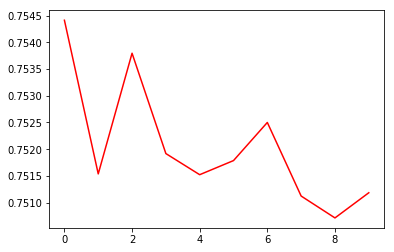

In [64]:
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, class_weight=class_weight)

train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### Change optimizer to SGD and add hidden layer units to 50

In [65]:
model = models.Sequential()

model.add(layers.Dense(input_dim=x_train.shape[1],
                       units=50, 
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

The result doesn't change

Epoch 1/10
2264/2264 [==============================] - 0s 125us/step - loss: 0.7684 - acc: 0.4960
Epoch 2/10
2264/2264 [==============================] - 0s 21us/step - loss: 0.7588 - acc: 0.5455
Epoch 3/10
2264/2264 [==============================] - 0s 24us/step - loss: 0.7545 - acc: 0.5459
Epoch 4/10
2264/2264 [==============================] - 0s 24us/step - loss: 0.7526 - acc: 0.5459
Epoch 5/10
2264/2264 [==============================] - 0s 28us/step - loss: 0.7516 - acc: 0.5459
Epoch 6/10
2264/2264 [==============================] - 0s 26us/step - loss: 0.7512 - acc: 0.5459
Epoch 7/10
2264/2264 [==============================] - 0s 25us/step - loss: 0.7510 - acc: 0.5459
Epoch 8/10
2264/2264 [==============================] - 0s 26us/step - loss: 0.7509 - acc: 0.5459
Epoch 9/10
2264/2264 [==============================] - 0s 24us/step - loss: 0.7508 - acc: 0.5459
Epoch 10/10
252/252 [==============================] - 0s 13us/step
Training accuracy: 0.5459363958650258
Testing acc

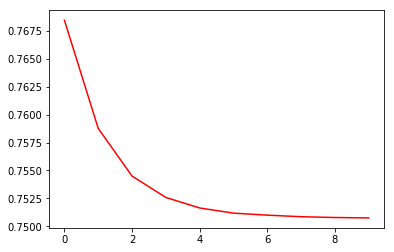

In [66]:
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, class_weight=class_weight)

train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

## Discussion

### Why the accuracy is so low among three models?

In my view, machine learning need to learn from a regular rule, however,
the market movement is so fast that the rules change every single day, hour, and even minute. It will cause that training not enough to represent test set in many case. For instance in this case. There may exist some features on world more related to the rise and fall of stock price than just 'Open price', 'high price' etc. Such as USA-China trade war.

Following, let look for another data set whose features has apparently relation with the target.

# Try another dataset

### Dataset: Titanic

Source:https://www.kaggle.com/c/titanic/data

In [67]:
df = pd.read_csv('./desktop/titanic/train.csv')

In [68]:
df = df.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked','Fare'], axis = 1)


In [69]:
average_age = df['Age'].sum() / df['Age'].count()
df['Age'].fillna(average_age, inplace = True)

In [70]:
sex_map = {'male' : 0, 'female' :1}
df['Sex'] = df['Sex'].map(sex_map)



In [71]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

list(x_train)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

In [73]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


## 1. Logistic Regression

In [74]:
clf = LogisticRegression(solver = 'liblinear')
clf = clf.fit(x_train, y_train)

In [75]:
probability = clf.predict_proba(x_test)

In [76]:
pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.7910447761194029

## 2. Support Vector Machine

In [77]:
svm = SVC(C=0.5, kernel='linear', probability=True)
svm.fit(x_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [78]:
y_pred = svm.predict(x_test)
y_proba = svm.predict_proba(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

## 3. Neural Network

Normalize datas

In [79]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [80]:
hidden_units = 10    
activation = 'relu'  
l2 = 0.001          
learning_rate = 0.01 
epochs = 20          
batch_size = 32

In [81]:
model = models.Sequential()

model.add(layers.Dense(input_dim=x_train.shape[1],
                       units=hidden_units, 
                       activation=activation))

model.add(layers.Dense(input_dim= hidden_units,
                       units=10, 
                       activation=activation))


model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [82]:
class_weight = {
    0: 1.,
    1: 1236 / 1028
}

Epoch 1/10
623/623 [==============================] - 0s 577us/step - loss: 0.6067 - acc: 0.7576
Epoch 2/10
623/623 [==============================] - 0s 31us/step - loss: 0.4997 - acc: 0.7978
Epoch 3/10
623/623 [==============================] - 0s 34us/step - loss: 0.4706 - acc: 0.8122
Epoch 4/10
623/623 [==============================] - 0s 35us/step - loss: 0.4584 - acc: 0.8186
Epoch 5/10
623/623 [==============================] - 0s 34us/step - loss: 0.4509 - acc: 0.8090
Epoch 6/10
623/623 [==============================] - 0s 34us/step - loss: 0.4517 - acc: 0.8042
Epoch 7/10
623/623 [==============================] - 0s 33us/step - loss: 0.4411 - acc: 0.8218
Epoch 8/10
623/623 [==============================] - 0s 30us/step - loss: 0.4424 - acc: 0.8234
Epoch 9/10
623/623 [==============================] - 0s 32us/step - loss: 0.4445 - acc: 0.8186
Epoch 10/10
268/268 [==============================] - 0s 13us/step
Training accuracy: 0.8378812199036918
Testing accuracy: 0.813432834

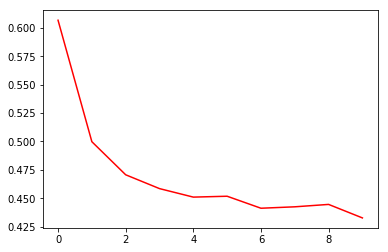

In [83]:
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, class_weight=class_weight)

train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

# Discussion

Accuracy of each model:
1. Neural Network: 0.8134
2. Logistic regression: 0.7910
3. SVM: 0.7500

1. Apparently, the accuracy of predicting titanic is much more higher than
predicting stock price with these 3 models. In my opinion, this is because the feature in Titanic dataset is more to do with the target.
In contrast, features in stock dataset are not much related to whether closed price will rise or fall on next day. Thus, no matter which model we choose, the accuracy won't fit our expect.
2.  As for the accuracy among these three models, neural network is the highest.It makes sense because NN is a parametrics models, and it can be design as multiple layer, which means a better learn ability.